## Notebook #1: Background; EDA and Cleaning

In this notebook, I will present an introduction to this project including some background information and my problem statement. I will then read the data, exploring initial relationships and cleaning the obvious issues. I will include notes as I go along and review my findings at the end.

--- 

I work for the analytics department at a realty group in Iowa that is gearing up for our annual insights meeting. I have been tasked with giving some predictions of sale prices to our realtors based on features of and around homes. These predictions are to be used to aid the realtors in setting an offer price for their clients that are selling their homes. The goal here is to provide guidance on listings based on the heatures that the home has or does not have. 

Explicitly, the problem is that our realty group wants more accurate listing prices based on the value of the home: What kind of features would best predict a higher or lower sale price of a home? I will examine housing sales in Ames, Iowa from 2006 to 2010 in an attempt to explore these relationships using regressions and transformations to make predictions. 

For some background, Ames is located nearly in the center of Iowa. It is a college town, home to Iowa State University. It has been named one of the top places for STEM grads and millenials as well as one of the healthiest cities in America. It boasts top ranking public schools, access to great healthcare services, varied parks and outdoor acitvities, and a population of 66,191. All of this means that there is much potential for a good housing market in Ames! [*Source*](https://www.cityofames.org/about-ames/about-ames).

As far as housing sales go, Zillow, one of the most popular websites for sale listings, states that in order to sell your home for the best price, you should look at competitive sales in your area based on square footage, price, and age - that these are important aspects that will influence home value [*Source*](https://www.zillow.com/sellers-guide/how-to-price-home-to-sell/). USA Today states that buyers might pay more for features such as a more recetnly built home (within 5 years), an upgraded kitchen, and a fireplace [*Source*](https://www.usatoday.com/story/money/personalfinance/2013/04/28/24-7-home-features/2106203/). These are all things we know and do already, as realtors. However, what if there was a way we could predict which features would actually increase home sale price? That is what I will be presenting today. 

Let's dive into the data.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [6]:
df_house = pd.read_csv('./datasets/train.csv')
pd.set_option('display.max_columns', None)
df_house

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,Ex,Y,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0,Fin,2.0,520.0,TA,TA,Y,0,276,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,Y,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1961.0,Unf,2.0,539.0,TA,TA,Y,158,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,TA,9,Typ,1,TA,Detchd,1929.0,Unf,2.0,342.0,Fa,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN

At first glance and from what I know about homes and home buying, I'm seeing a ton of really great features that could potentially be great predictors as well. 

In [7]:
df_house.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [8]:
df_house.columns = df_house.columns.str.lower().str.replace(' ', '_')  
# changing feature names to more workflow friendly 

In [9]:
df_house.head(3)  # ensuring it stuck

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [10]:
df_house.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [431]:
df_house.isnull().sum().loc[lambda x: x>0]

lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

I'm seeing a ton of missing values. Initially, when I first went through cleaning and analysis, I got rid of the features that had over 1000 missing data points because I was missing over half the data. However, after I had already made and adjusted a few models, I realized I never went over the data description. So I went to my model and took away that drop, improving my model. However, in hopes of showing my process, I will keep my clean and analysis the same until we get to the point where I realized my mistake. For now, those columns will be dropped, and I will show the models I made with them removed. In the end, I still took care of the missing values in my preprocessing, and I did still get rid of the 'pid' column.

--- 

What I had written prior to my realization: 

I'm going to get rid of the rows that have 1000+ missing data points. I am doing this because that feature will likely end up not being valuable to us anyways because so much of the data is missing. For the rest of the missing values, I will transform them later in my preprocessing. While I'm here, I will go ahead and get rid of the 'pid' column since it is simply identifier information not relevant to our analysis on sale prices. The 'id' column will be important in evaluating my test set, but for now, it is not needed. 

--- 

In [432]:
df_house.drop(columns=['alley',  # getting rid of those columns
                 'fireplace_qu',
                 'pool_qc',
                 'fence',
                 'misc_feature',
                 'pid'], inplace=True)

In [433]:
df_house.isnull().sum().loc[lambda x: x>0]
# Ensuring it stuck

lot_frontage      330
mas_vnr_type       22
mas_vnr_area       22
bsmt_qual          55
bsmt_cond          55
bsmt_exposure      58
bsmtfin_type_1     55
bsmtfin_sf_1        1
bsmtfin_type_2     56
bsmtfin_sf_2        1
bsmt_unf_sf         1
total_bsmt_sf       1
bsmt_full_bath      2
bsmt_half_bath      2
garage_type       113
garage_yr_blt     114
garage_finish     114
garage_cars         1
garage_area         1
garage_qual       114
garage_cond       114
dtype: int64

In [434]:
df_house.columns

Index(['id', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'garage_type',
       'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_a

Alright! Now that we've done that short fix - I'm going to do some initial visualizations and deeper cleans.

In [435]:
df_house.head(3)

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000


In [436]:
df_house.shape

(2051, 75)

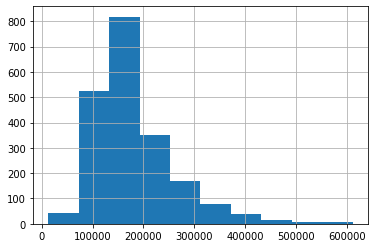

In [437]:
df_house['saleprice'].hist();  # Looking at the distribution of my target variable

It appears the distribution of the target variable saleprice is slightly skewed right. A log may be able to fix this. I also see that there are some values that are very close to zero - I wonder if these are family sales or foreclosures. It may be worth looking into these as they are outliers. 

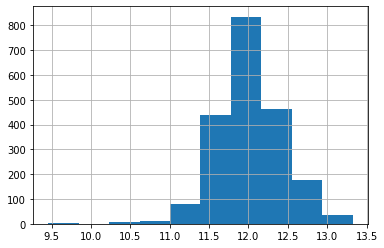

In [438]:
np.log(df_house['saleprice']).hist();   # Testing to see if a log transformation might be worth it later on 

Again, here we can see how the log transformation fixed the distribution but the dataset still contains those outliers that are so close to zero.

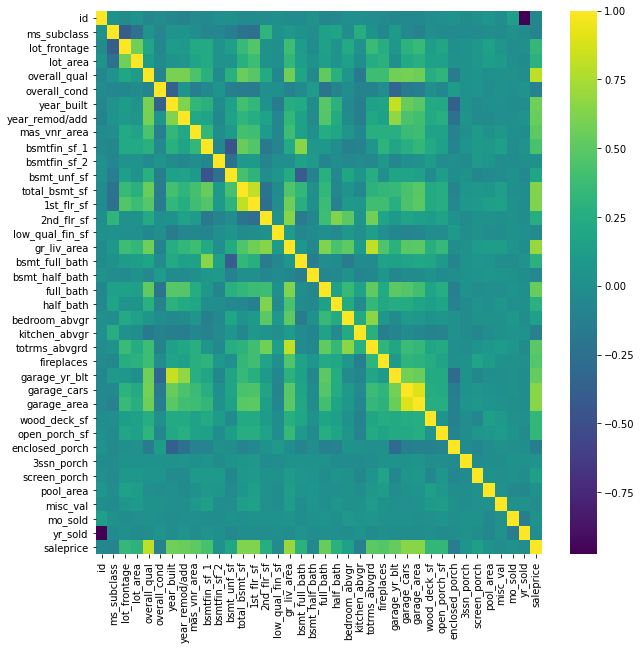

In [439]:
plt.figure(figsize=(10,10))   
sns.heatmap(df_house.corr(), cmap='viridis');

First, I wanted to look at a quick heatmap of the numeric data to check for multicolinearity. It appears there are quite a few features that are colinear relative to our target saleprice; however, overall, there are not many features that are colinear. From what I can see, most of the heatmap is the teal color that coincides with no or little correlation. Instead of looking at a giant pairplot of all numerical data, I wanted to look at just the features that had a correlation with the target variable of over 0.5 absolute. I got help with this from this article about feature selection: [*Source*](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)

In [440]:
cor = df_house.corr()
cor_target = abs(cor['saleprice'])
correlated_features = cor_target[cor_target>0.5]
correlated_features

overall_qual      0.800207
year_built        0.571849
year_remod/add    0.550370
mas_vnr_area      0.512230
total_bsmt_sf     0.628925
1st_flr_sf        0.618486
gr_liv_area       0.697038
full_bath         0.537969
totrms_abvgrd     0.504014
garage_yr_blt     0.533922
garage_cars       0.648220
garage_area       0.650270
saleprice         1.000000
Name: saleprice, dtype: float64

There are so many columns in this dataset and potential ways to go with this. So far, I have found that there are many numeric variables that are correlated with sale price that may make good predictors. As I continue to look at the data and model, I will disucss other findings I see.

--- 

In the next notebook, I will start by running a simple Linear Regression with a few numeric variables. Then, I will run a Lasso with all numeric variables. I believe these two models will give me a good foundation to view the data without feeling too overwhelmed by its size.

To start with the Linear Regression, I will look at:

* Year remodeled
* Above ground living area, square feet
* Total rooms above ground
* Overall quality 
* Garage area 

I have chosen these out of the above correlations simply from outside knowledge of being good things to look at for a house. I also examined these against the heatmap above. I was going to use year built in this set, but it has a higher correlation with overall quality. Therefore, I used year remodeled instead as it still is correlated with saleprice but it is not so highly correlated with another feature here. A deeper look into that below.

*Help from Caroline with this idea as I had some coder's block.*

0.602963557507532


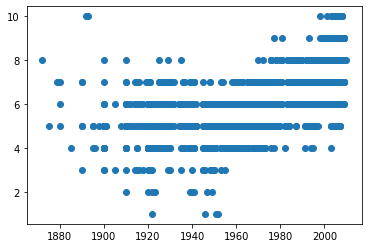

In [607]:
print(cor['year_built']['overall_qual'])
plt.scatter(df_house['year_built'], df_house['overall_qual']);

0.5846538097020901


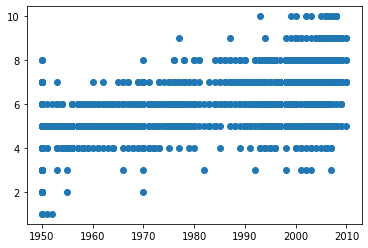

In [609]:
print(cor['year_remod/add']['overall_qual'])
plt.scatter(df_house['year_remod/add'], df_house['overall_qual']);

Even though it's a small difference, it is enough that I felt I should change which features are in my initial model.

To prepare for starting a model in the next notebook, I will create a smaller dataset that I can work closely with (df_start). Later in this project, I will create other smaller datasets like the one below to further tweak and finetune my model. I will discuss their purpose as they come up.

In [554]:
#  Creating a new df with the chosen variables
df_start = df_house[['year_remod/add', 'gr_liv_area', 'totrms_abvgrd', 'overall_qual', 'garage_area', 'saleprice']]

In [555]:
df_start.head(3)

,year_remod/add,gr_liv_area,totrms_abvgrd,overall_qual,garage_area,saleprice
0,2005,1479,6,6,475.0,130500
1,1997,2122,8,7,559.0,220000
2,2007,1057,5,5,246.0,109000


That feels much easier to work with! Let's see how this data set looks.

In [557]:
df_start.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year_remod/add  2049 non-null   int64  
 1   gr_liv_area     2049 non-null   int64  
 2   totrms_abvgrd   2049 non-null   int64  
 3   overall_qual    2049 non-null   int64  
 4   garage_area     2048 non-null   float64
 5   saleprice       2049 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 112.1 KB


In [558]:
df_start['garage_area'].fillna(df_start['garage_area'].mean(), inplace=True)  # filling the one NaN with the mean of the set with mean because garage_area is continuous

In [559]:
df_start.isnull().sum()

year_remod/add    0
gr_liv_area       0
totrms_abvgrd     0
overall_qual      0
garage_area       0
saleprice         0
dtype: int64

In [560]:
df_start.shape

(2049, 6)

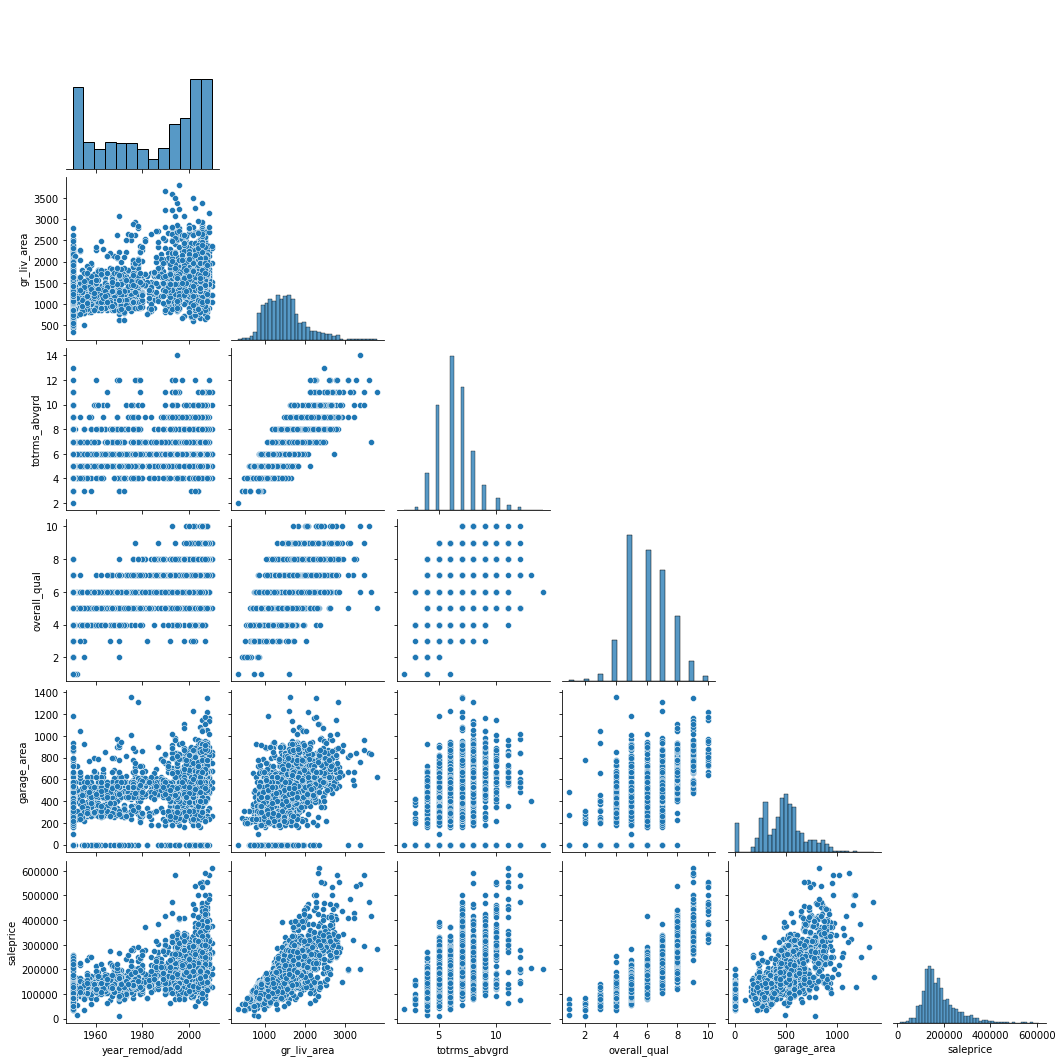

In [561]:
sns.pairplot(df_start, corner=True);

In [562]:
df_start.describe()

,year_remod/add,gr_liv_area,totrms_abvgrd,overall_qual,garage_area,saleprice
count,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000
mean,1984.166423,1495.553441,6.428990,6.108346,472.878418,181479.018058
std,21.032785,485.783577,1.544572,1.421780,214.449168,79295.913255
min,1950.000000,334.000000,2.000000,1.000000,0.000000,12789.000000
25%,1964.000000,1128.000000,5.000000,5.000000,319.000000,129800.000000
50%,1993.000000,1444.000000,6.000000,6.000000,480.000000,162500.000000
75%,2004.000000,1728.000000,7.000000,7.000000,576.000000,214000.000000
max,2010.000000,3820.000000,14.000000,10.000000,1356.000000,611657.000000


''

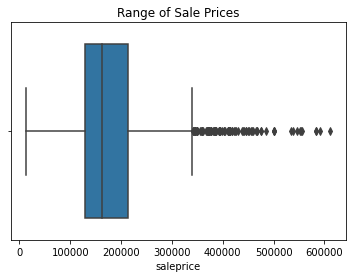

In [12]:


sns.boxplot(df_house['saleprice']).set(title='Range of Sale Prices')

plt.savefig('range_sale_price.png', dpi=300)
;

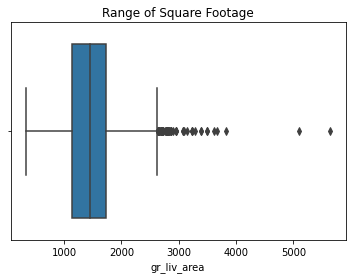

In [13]:
sns.boxplot(df_house['gr_liv_area']).set(title='Range of Square Footage');

There are two major outliers here in the GR_LIV_AREA column. I'm going to remove these two rows in an attempt to control their influence on the skew of the data. 

In [549]:
df_house = df_house[df_house['gr_liv_area'] < 4000]

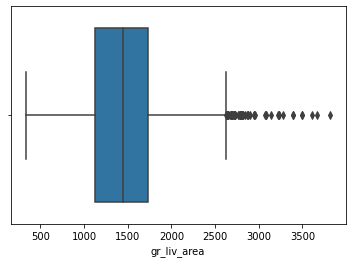

In [610]:
sns.boxplot(df_house['gr_liv_area']);

---

As I reach the end of this first notebook, I feel I have a good understanding of the data and the direction I need to take. I will start the next notebook with the creation of my first model and show the process through which I worked and tweaked that model to create my final model that is featured in notebook #3. 